<a href="https://colab.research.google.com/github/jangInw007/JENZY_Project/blob/main/JENZY_is_perfect_project_Basicpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# รวม Outcomes 2025-01 ถึง 2025-05

combined_outcomes_2025_all_months

In [3]:
import os
import pandas as pd

# กำหนดเส้นทางหลักของข้อมูล
base_path = '/content/drive/MyDrive/JENZY/Data'
all_outcomes_dfs = []

# วนซ้ำตั้งแต่เดือน 1 (ม.ค.) ถึง 5 (พ.ค.)
for month in range(1, 6):
    month_str = f'2025-{month:02d}'
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            # ตรวจสอบว่าไฟล์เป็น outcomes.csv หรือไม่
            if 'outcomes.csv' in file:
                filepath = os.path.join(month_path, file)
                try:
                    df = pd.read_csv(filepath)

                    # 1. สร้างคอลัมน์ Police_Force จากชื่อไฟล์
                    file_parts = file.replace('-outcomes.csv', '').split('-')
                    police_force = '-'.join(file_parts[2:]).strip()
                    df['Police_Force'] = police_force

                    # 2. สร้างคอลัมน์ Month (รูปแบบ 01, 02, ... 05)
                    df['Month'] = f'{month:02d}'

                    # 3. เพิ่ม DataFrame เข้าในรายการ
                    all_outcomes_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

if all_outcomes_dfs:
    # 4. รวม DataFrame ทั้งหมด
    combined_outcomes_2025_all_months = pd.concat(all_outcomes_dfs, ignore_index=True)

    # 5. [ขั้นตอนสำคัญ] ลบแถวที่ซ้ำซ้อนกันทั้งหมด
    # (ใช้ทุกคอลัมน์เพื่อยืนยันว่าคดีซ้ำกันจริง)
    rows_before_drop = len(combined_outcomes_2025_all_months)
    combined_outcomes_2025_all_months.drop_duplicates(inplace=True)
    rows_after_drop = len(combined_outcomes_2025_all_months)

    print("Combined and Cleaned Outcomes Data:")
    print(f"Total rows before de-duplication: {rows_before_drop}")
    print(f"Total rows dropped due to duplication: {rows_before_drop - rows_after_drop}")
    print(f"Total rows in final combined outcomes data: {rows_after_drop}")
    display(combined_outcomes_2025_all_months.tail(5))
else:
    print("No outcomes files found in the specified directories.")

Combined and Cleaned Outcomes Data:
Total rows before de-duplication: 794203
Total rows dropped due to duplication: 35660
Total rows in final combined outcomes data: 758543


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force
794198,556b7983b7a8b71cc1f3b7bc3578539103fd0fc17347a8...,05,Suffolk Constabulary,Suffolk Constabulary,1.198680,52.050820,On or near Chaplains Gardens,E01029966,Ipswich 009D,Unable to prosecute suspect,suffolk
794199,ba4d5e5b9b9423f22f0bc1dab59ab4bebad54a657dc1d4...,05,Suffolk Constabulary,Suffolk Constabulary,1.318513,52.092376,On or near Doric Place,E01030211,East Suffolk 022D,Unable to prosecute suspect,suffolk
794200,ea4767117c9ce66fe45bad721a9c7ba34073f780163235...,05,Suffolk Constabulary,Suffolk Constabulary,1.483242,52.216987,On or near Saxon Road,E01030210,East Suffolk 018D,Unable to prosecute suspect,suffolk
794201,0f2d597755bae68bd9b9d36e2a2af04b2941510d87254a...,05,Suffolk Constabulary,Suffolk Constabulary,1.327349,52.100626,On or near Deben Meadows,E01030194,East Suffolk 020B,Action to be taken by another organisation,suffolk
794202,8a100dda3bd72723167cc2097200f4debd6c17fa40dd22...,05,Suffolk Constabulary,Suffolk Constabulary,0.731994,52.049756,On or near Hillcrest Road,E01029916,Babergh 007E,Unable to prosecute suspect,suffolk


In [4]:
combined_outcomes_2025_all_months.shape

(758543, 11)

# Clean Data

## Outcomes

In [5]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11315
Latitude,11315
Location,0
LSOA code,11317
LSOA name,11317
Outcome type,0


### 1. เติม Dummy - LSOA Missing

In [6]:
# แทนที่ค่าว่างใน LSOA ด้วยข้อความระบุว่าข้อมูลขาดหายไป
imputation_value = 'LSOA Missing'

combined_outcomes_2025_all_months['LSOA code'].fillna(imputation_value, inplace=True)
combined_outcomes_2025_all_months['LSOA name'].fillna(imputation_value, inplace=True)

/tmp/ipython-input-287462184.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_outcomes_2025_all_months['LSOA code'].fillna(imputation_value, inplace=True)
/tmp/ipython-input-287462184.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [7]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11315
Latitude,11315
Location,0
LSOA code,0
LSOA name,0
Outcome type,0


### สร้าง Column เพื่อระบุว่าแถวใดถูกเติมค่า

ถ้า Longitude เป็น NaN → ธงจะเป็น True (หมายความว่าแถวนี้จะถูกเติมค่าในขั้นตอนต่อไป)

ถ้า Longitude มีค่า → ธงจะเป็น False (หมายความว่าเป็นพิกัดจริง)

In [8]:
# 2. สร้าง Flag Column เพื่อระบุว่าแถวใดถูกเติมค่า
combined_outcomes_2025_all_months['Is_LonLat_Imputed'] = combined_outcomes_2025_all_months['Longitude'].isnull()
combined_outcomes_2025_all_months.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed
0,36c74d0ef277fc0a1199c04a701c5a778079d7e1f39def...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.187811,51.703486,On or near Well Hill,E01022384,Stroud 010D,Investigation complete; no suspect identified,gloucestershire,False
1,76048dcfc086c0251da35b492a5312abe77ba9a4254316...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Unable to prosecute suspect,gloucestershire,True
2,d6a8e93f57127b6d424fb61b7cf263442e7c9ba3119eec...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Investigation complete; no suspect identified,gloucestershire,True
3,2df4827fcd024db83c38932b977dd1f430a86cc3b76c36...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Local resolution,gloucestershire,True
4,bacebcd65948542f6f6a2a292a8b8e8e6dd431f94a617c...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.080914,51.896367,On or near A4015,E01022126,Cheltenham 009F,Investigation complete; no suspect identified,gloucestershire,False


### คำนวณค่ามัธยฐานของ Longitude/Latitude สำหรับแต่ละ Police_Force

In [9]:
# 1. คำนวณค่ามัธยฐานของ Longitude/Latitude สำหรับแต่ละ Police_Force
force_coords_median = combined_outcomes_2025_all_months.groupby('Police_Force')[['Longitude', 'Latitude']].median()

# 2. เติมค่าว่างที่เหลือด้วยค่ามัธยฐานของ Police Force
combined_outcomes_2025_all_months['Longitude'].fillna(
    combined_outcomes_2025_all_months['Police_Force'].map(force_coords_median['Longitude']),
    inplace=True
)
combined_outcomes_2025_all_months['Latitude'].fillna(
    combined_outcomes_2025_all_months['Police_Force'].map(force_coords_median['Latitude']),
    inplace=True
)

/tmp/ipython-input-1755549259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_outcomes_2025_all_months['Longitude'].fillna(
/tmp/ipython-input-1755549259.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [10]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Outcome type,0


In [13]:
# กรองเฉพาะแถวที่มี Crime ID ซ้ำ
duplicate_crime_rows = combined_outcomes_2025_all_months[combined_outcomes_2025_all_months['Crime ID'].duplicated(keep=False)].sort_values(by=['Crime ID', 'Month'])

# ตรวจสอบว่า Outcome type มีการเปลี่ยนแปลงสำหรับแต่ละ Crime ID ที่ซ้ำกันหรือไม่
# เราจะ Group by Crime ID และนับจำนวน Outcome type ที่ไม่ซ้ำกันในแต่ละกลุ่ม
outcome_change_check = duplicate_crime_rows.groupby('Crime ID')['Outcome type'].nunique().reset_index(name='Unique_Outcome_Types')

# กรองเฉพาะ Crime ID ที่มี Unique_Outcome_Types มากกว่า 1 (หมายถึง Outcome type เปลี่ยนแปลง)
crime_ids_with_outcome_change = outcome_change_check[outcome_change_check['Unique_Outcome_Types'] > 1]['Crime ID']

print(f"จำนวน Crime ID ที่ซ้ำกันในต่างเดือนและมี Outcome type เปลี่ยนแปลง: {len(crime_ids_with_outcome_change)}")

# หากต้องการดูตัวอย่าง Crime ID ที่ Outcome type เปลี่ยนแปลง:
if not crime_ids_with_outcome_change.empty:
    print("\nตัวอย่าง Crime ID ที่มี Outcome type เปลี่ยนแปลง:")
    # แสดงข้อมูลเต็มของ Crime ID เหล่านี้
    display(duplicate_crime_rows[duplicate_crime_rows['Crime ID'].isin(crime_ids_with_outcome_change)].head(10))
else:
    print("\nไม่มี Crime ID ที่ซ้ำกันในต่างเดือนและมี Outcome type เปลี่ยนแปลง")


จำนวน Crime ID ที่ซ้ำกันในต่างเดือนและมี Outcome type เปลี่ยนแปลง: 1827

ตัวอย่าง Crime ID ที่มี Outcome type เปลี่ยนแปลง:


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed
29734,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,01,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Investigation complete; no suspect identified,south-wales,False
429596,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,02,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Suspect charged,south-wales,False
111715,00166cc96c988d355ee0a73debb789350128d91891db68...,01,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Further action is not in the public interest,merseyside,False
537798,00166cc96c988d355ee0a73debb789350128d91891db68...,02,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Investigation complete; no suspect identified,merseyside,False
353922,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,01,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Investigation complete; no suspect identified,north-wales,False
734723,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,04,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Suspect charged,north-wales,False
171349,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,01,Metropolitan Police Service,Metropolitan Police Service,0.036966,51.482063,On or near Supermarket,E01001591,Greenwich 012C,Investigation complete; no suspect identified,metropolitan,False
664356,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,02,Metropolitan Police Service,Metropolitan Police Service,0.036966,51.482063,On or near Supermarket,E01001591,Greenwich 012C,Suspect charged,metropolitan,False
555900,00858cae3f39639e6234299a1e2022491c81430bed97db...,02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.507589,51.482448,On or near Berkeley Road,E01014977,South Gloucestershire 025E,Formal action is not in the public interest,avon-and-somerset,False
555901,00858cae3f39639e6234299a1e2022491c81430bed97db...,02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.507589,51.482448,On or near Berkeley Road,E01014977,South Gloucestershire 025E,Suspect charged,avon-and-somerset,False


In [14]:

# ตรวจสอบว่า 'crime_ids_with_outcome_change' ถูกนิยามไว้แล้ว
if 'crime_ids_with_outcome_change' not in locals() and 'crime_ids_with_outcome_change' not in globals():
    print("Error: 'crime_ids_with_outcome_change' is not defined. Please run the cell that defines this variable first.")
else:
    # 1. สร้างคอลัมน์ 'Outcome_Change_Status' (True/False)
    # True ถ้า Crime ID นี้มีการเปลี่ยนแปลง Outcome type ในต่างเดือน
    # False ถ้า Crime ID นี้ไม่ซ้ำเลย หรือซ้ำแต่ Outcome type ไม่เปลี่ยน
    combined_outcomes_2025_all_months['Outcome_Change_Status'] = combined_outcomes_2025_all_months['Crime ID'].isin(crime_ids_with_outcome_change)

    # 2. สร้างคอลัมน์ 'month_sort'
    # กำหนดค่าเริ่มต้นเป็น -1 สำหรับแถวที่ไม่มีการเปลี่ยนแปลง Outcome type
    combined_outcomes_2025_all_months['month_sort'] = -1

    # กรองเฉพาะแถวที่มี Outcome_Change_Status เป็น True
    df_with_changes_only = combined_outcomes_2025_all_months[combined_outcomes_2025_all_months['Outcome_Change_Status']].copy()

    # จัดเรียงตาม Crime ID และ Month เพื่อให้ง่ายต่อการระบุเดือนที่ต่ำสุด
    df_with_changes_only = df_with_changes_only.sort_values(by=['Crime ID', 'Month'])

    # คำนวณเดือนที่ต่ำที่สุดสำหรับแต่ละ Crime ID ที่มีการเปลี่ยนแปลง
    min_months = df_with_changes_only.groupby('Crime ID')['Month'].transform('min')

    # คำนวณ month_sort (0 ถ้าเป็นเดือนต่ำสุด, 1 ถ้าเป็นเดือนที่สูงกว่า)
    # ทำการเปรียบเทียบและแปลงเป็น int บน df_with_changes_only ก่อน
    calculated_month_sort = (df_with_changes_only['Month'] != min_months).astype(int)

    # กำหนดค่า month_sort กลับไปยัง df_outcome โดยใช้ index ของ df_with_changes_only
    combined_outcomes_2025_all_months.loc[df_with_changes_only.index, 'month_sort'] = calculated_month_sort


    print("\nDataFrame with new 'Outcome_Change_Status' and 'month_sort' columns:")
    # แสดงตัวอย่างแถวที่มี Outcome_Change_Status เป็น True เพื่อตรวจสอบ
    display(combined_outcomes_2025_all_months[combined_outcomes_2025_all_months['Outcome_Change_Status']].sort_values(by=['Crime ID', 'Month']).head(10))

    # แสดงตัวอย่างบางแถวที่ Outcome_Change_Status เป็น False (-1 ใน month_sort)
    print("\nExample rows with no Outcome type change (Outcome_Change_Status is False):")
    display(combined_outcomes_2025_all_months[~combined_outcomes_2025_all_months['Outcome_Change_Status']].head())


DataFrame with new 'Outcome_Change_Status' and 'month_sort' columns:


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed,Outcome_Change_Status,month_sort
29734,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,01,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Investigation complete; no suspect identified,south-wales,False,True,0
429596,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,02,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Suspect charged,south-wales,False,True,1
111715,00166cc96c988d355ee0a73debb789350128d91891db68...,01,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Further action is not in the public interest,merseyside,False,True,0
537798,00166cc96c988d355ee0a73debb789350128d91891db68...,02,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Investigation complete; no suspect identified,merseyside,False,True,1
353922,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,01,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Investigation complete; no suspect identified,north-wales,False,True,0
734723,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,04,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Suspect charged,north-wales,False,True,1
171349,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,01,Metropolitan Police Service,Metropolitan Police Service,0.036966,51.482063,On or near Supermarket,E01001591,Greenwich 012C,Investigation complete; no suspect identified,metropolitan,False,True,0
664356,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,02,Metropolitan Police Service,Metropolitan Police Service,0.036966,51.482063,On or near Supermarket,E01001591,Greenwich 012C,Suspect charged,metropolitan,False,True,1
555900,00858cae3f39639e6234299a1e2022491c81430bed97db...,02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.507589,51.482448,On or near Berkeley Road,E01014977,South Gloucestershire 025E,Formal action is not in the public interest,avon-and-somerset,False,True,0
555901,00858cae3f39639e6234299a1e2022491c81430bed97db...,02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.507589,51.482448,On or near Berkeley Road,E01014977,South Gloucestershire 025E,Suspect charged,avon-and-somerset,False,True,0



Example rows with no Outcome type change (Outcome_Change_Status is False):


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed,Outcome_Change_Status,month_sort
0,36c74d0ef277fc0a1199c04a701c5a778079d7e1f39def...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.187811,51.703486,On or near Well Hill,E01022384,Stroud 010D,Investigation complete; no suspect identified,gloucestershire,False,False,-1
1,76048dcfc086c0251da35b492a5312abe77ba9a4254316...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Unable to prosecute suspect,gloucestershire,True,False,-1
2,d6a8e93f57127b6d424fb61b7cf263442e7c9ba3119eec...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Investigation complete; no suspect identified,gloucestershire,True,False,-1
3,2df4827fcd024db83c38932b977dd1f430a86cc3b76c36...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Local resolution,gloucestershire,True,False,-1
4,bacebcd65948542f6f6a2a292a8b8e8e6dd431f94a617c...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.080914,51.896367,On or near A4015,E01022126,Cheltenham 009F,Investigation complete; no suspect identified,gloucestershire,False,False,-1


# คำถาม อย่างต่ำคนละ 2 คำถาม

##Outcomes

### 1.เกิด Outcomes Type เท่าไหร่และคิดเป็นกี่เปอร์เซ็นต์ เรียง Top 5

In [15]:
# 1. คำนวณจำนวนและสัดส่วนของแต่ละ Outcome type ในภาพรวม
total_outcomes_breakdown = combined_outcomes_2025_all_months.groupby('Outcome type').size().reset_index(name='Total_Count')
total_outcomes_breakdown['Overall_Proportion'] = (
    total_outcomes_breakdown['Total_Count'] / total_outcomes_breakdown['Total_Count'].sum()
) * 100 # แปลงเป็นเปอร์เซ็นต์

print("Overall Ranking of Outcome Types Across All Police Forces:")
# จัดเรียงตามจำนวนมากไปน้อยและแสดงผล
display(total_outcomes_breakdown.sort_values(by='Total_Count', ascending=False).round(2).astype(str))

Overall Ranking of Outcome Types Across All Police Forces:


,Outcome type,Total_Count,Overall_Proportion
11,Unable to prosecute suspect,332509,43.84
4,Investigation complete; no suspect identified,288727,38.06
9,Suspect charged,75012,9.89
5,Local resolution,25650,3.38
0,Action to be taken by another organisation,13107,1.73
6,Offender given a caution,7317,0.96
3,Further investigation is not in the public int...,6445,0.85
1,Formal action is not in the public interest,4451,0.59
2,Further action is not in the public interest,3756,0.5
10,Suspect charged as part of another case,837,0.11


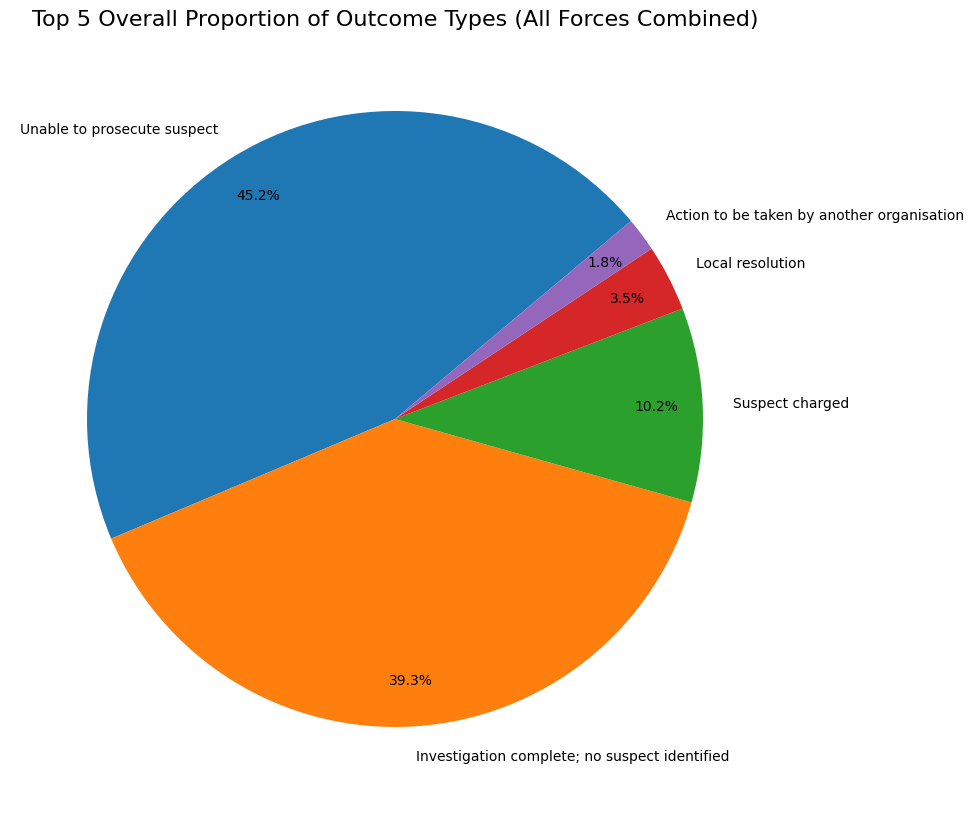

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_10_outcomes = total_outcomes_breakdown.nlargest(5, 'Total_Count')
plt.figure(figsize=(10, 10))
plt.pie(
    top_10_outcomes['Overall_Proportion'],
    labels=top_10_outcomes['Outcome type'],
    autopct='%1.1f%%', # แสดงผลเป็นเปอร์เซ็นต์
    startangle=40,
    pctdistance=0.85 # ระยะห่างของข้อความเปอร์เซ็นต์จากศูนย์กลาง
)
plt.title('Top 5 Overall Proportion of Outcome Types (All Forces Combined)', fontsize=16)
plt.show()

###2.แนวโน้มรายเดือนของ Outcome Type ที่พบบ่อยที่สุด

เราสามารถดูได้ว่าจำนวนคดีใน Outcome type ที่สำคัญมีการเปลี่ยนแปลงอย่างไรในแต่ละเดือน

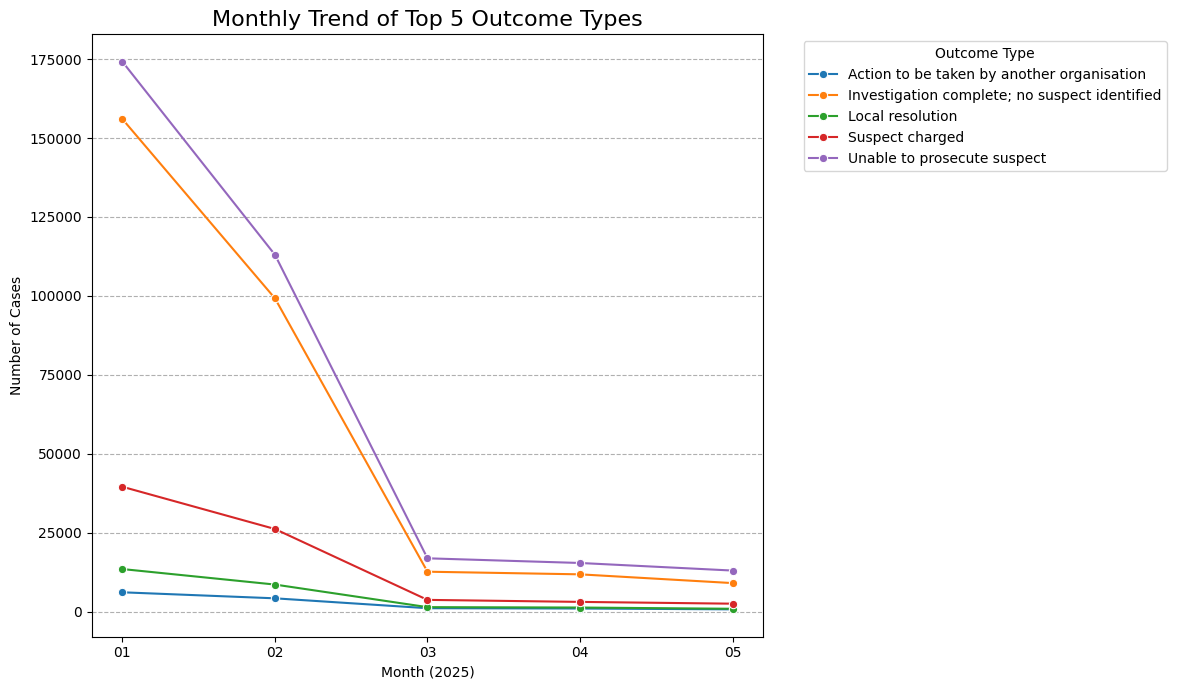

In [17]:
# เลือก Outcome type 5 อันดับแรกจาก total_outcomes_breakdown ที่คำนวณไว้ก่อนหน้านี้
top_5_outcome_types = total_outcomes_breakdown.nlargest(5, 'Total_Count')['Outcome type'].tolist()

# กรองข้อมูลเฉพาะ Outcome type 5 อันดับแรก
df_top_outcomes = combined_outcomes_2025_all_months[
    combined_outcomes_2025_all_months['Outcome type'].isin(top_5_outcome_types)
].copy()

# นับจำนวนคดีแยกตามเดือนและ Outcome type
monthly_outcome_counts = df_top_outcomes.groupby(['Month', 'Outcome type']).size().reset_index(name='Count')

# สร้างกราฟเส้นแสดงแนวโน้มรายเดือน
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_outcome_counts,
    x='Month',
    y='Count',
    hue='Outcome type',
    marker='o' # เพิ่ม marker ที่จุดข้อมูล
)

plt.title('Monthly Trend of Top 5 Outcome Types', fontsize=16)
plt.xlabel('Month (2025)')
plt.ylabel('Number of Cases')
plt.xticks(monthly_outcome_counts['Month'].unique()) # แสดงทุกเดือนบนแกน x
plt.grid(axis='y', linestyle='--')
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
# ตรวจสอบว่ามีค่าซ้ำกันในคอลัมน์ 'Crime ID' หรือไม่
# duplicated() จะคืนค่าเป็น Series ของ True/False โดย True หมายถึงค่าซ้ำ
# keep=False จะทำเครื่องหมายทุกค่าที่ซ้ำกันเป็น True
duplicate_crime_ids_mask = combined_outcomes_2025_all_months['Crime ID'].duplicated(keep=False)

# กรองเฉพาะแถวที่มี Crime ID ซ้ำกันทั้งหมด (ไม่ว่าเดือนไหนก็ตาม)
duplicate_crime_rows_all = combined_outcomes_2025_all_months[duplicate_crime_ids_mask].sort_values(by=['Crime ID', 'Month'])

# Group by Crime ID และนับจำนวน Outcome type ที่ไม่ซ้ำกันสำหรับแต่ละ Crime ID ที่ซ้ำกัน
outcome_change_check_all = duplicate_crime_rows_all.groupby('Crime ID')['Outcome type'].nunique().reset_index(name='Unique_Outcome_Types_All_Months')

# กรองเฉพาะ Crime ID ที่มี Unique_Outcome_Types_All_Months มากกว่า 1 (หมายถึง Outcome type เปลี่ยนแปลงในภาพรวม)
crime_ids_with_outcome_change_all = outcome_change_check_all[outcome_change_check_all['Unique_Outcome_Types_All_Months'] > 1]['Crime ID']

print(f"จำนวน Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลง (ไม่ว่าเดือนเดียวกันหรือต่างเดือน): {len(crime_ids_with_outcome_change_all)}")

# หากต้องการดูตัวอย่าง Crime ID ที่มี Outcome type เปลี่ยนแปลงในภาพรวม:
if not crime_ids_with_outcome_change_all.empty:
    print("\nตัวอย่าง Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลง (ไม่ว่าเดือนเดียวกันหรือต่างเดือน):")
    # แสดงข้อมูลเต็มของ Crime ID เหล่านี้
    display(duplicate_crime_rows_all[duplicate_crime_rows_all['Crime ID'].isin(crime_ids_with_outcome_change_all)].head(5))
else:
    print("\nไม่มี Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลงในภาพรวม")

จำนวน Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลง (ไม่ว่าเดือนเดียวกันหรือต่างเดือน): 1827

ตัวอย่าง Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลง (ไม่ว่าเดือนเดียวกันหรือต่างเดือน):


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed,Outcome_Change_Status,month_sort
29734,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,01,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Investigation complete; no suspect identified,south-wales,False,True,0
429596,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,02,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Suspect charged,south-wales,False,True,1
111715,00166cc96c988d355ee0a73debb789350128d91891db68...,01,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Further action is not in the public interest,merseyside,False,True,0
537798,00166cc96c988d355ee0a73debb789350128d91891db68...,02,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Investigation complete; no suspect identified,merseyside,False,True,1
353922,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,01,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Investigation complete; no suspect identified,north-wales,False,True,0


### 3.รูปแบบการเปลี่ยนแปลง Outcome type และจำนวนครั้งที่พบ ในCrime ID ที่มีการเปลี่ยนแปลง Outcome type

In [21]:
# กรองเฉพาะแถวที่มี Crime ID ที่มีการเปลี่ยนแปลง Outcome type (ใช้ crime_ids_with_outcome_change_all จากเซลล์ก่อนหน้า)
df_with_changes = combined_outcomes_2025_all_months[combined_outcomes_2025_all_months['Crime ID'].isin(crime_ids_with_outcome_change_all)].copy()

# จัดเรียงตาม Crime ID และ Month เพื่อให้ง่ายต่อการระบุ outcome แรกและสุดท้าย
df_with_changes = df_with_changes.sort_values(by=['Crime ID', 'Month'])

# หาสถานะ Outcome type แรกสำหรับแต่ละ Crime ID
first_outcomes = df_with_changes.groupby('Crime ID').first()['Outcome type'].reset_index(name='First_Outcome_type')

# หาสถานะ Outcome type สุดท้ายสำหรับแต่ละ Crime ID
last_outcomes = df_with_changes.groupby('Crime ID').last()['Outcome type'].reset_index(name='Last_Outcome_type')

# รวมข้อมูล outcome แรกและสุดท้ายเข้าด้วยกัน
outcome_start_end = pd.merge(first_outcomes, last_outcomes, on='Crime ID')

# กรองเฉพาะแถวที่ Outcome type เริ่มต้นและสิ้นสุดแตกต่างกัน
outcome_start_end_changed = outcome_start_end[outcome_start_end['First_Outcome_type'] != outcome_start_end['Last_Outcome_type']].copy()

# นับจำนวนรูปแบบการเปลี่ยนแปลงที่ไม่ซ้ำกัน
num_unique_transitions = outcome_start_end_changed.groupby(['First_Outcome_type', 'Last_Outcome_type']).size().reset_index(name='Count')

print(f"จำนวนรูปแบบการเปลี่ยนแปลง Outcome type ที่แตกต่างกัน: {len(num_unique_transitions)}")

print("\nรายละเอียดรูปแบบการเปลี่ยนแปลง Outcome type และจำนวนครั้งที่พบ:")
# แสดงรูปแบบการเปลี่ยนแปลงทั้งหมดและจำนวนครั้งที่พบ (เรียงตามจำนวนมากไปน้อย)
display(num_unique_transitions.sort_values(by='Count', ascending=False))

จำนวนรูปแบบการเปลี่ยนแปลง Outcome type ที่แตกต่างกัน: 72

รายละเอียดรูปแบบการเปลี่ยนแปลง Outcome type และจำนวนครั้งที่พบ:


,First_Outcome_type,Last_Outcome_type,Count
35,Investigation complete; no suspect identified,Suspect charged,285
37,Investigation complete; no suspect identified,Unable to prosecute suspect,252
13,Formal action is not in the public interest,Suspect charged,208
70,Unable to prosecute suspect,Suspect charged,197
15,Formal action is not in the public interest,Unable to prosecute suspect,145
...,...,...,...
11,Formal action is not in the public interest,Local resolution,1
51,Offender given a drugs possession warning,Unable to prosecute suspect,1
44,Offender given a caution,Action to be taken by another organisation,1
60,Suspect charged as part of another case,Investigation complete; no suspect identified,1


In [26]:
# ตรวจสอบว่า DataFrame ที่จำเป็นถูกนิยามไว้แล้ว
if 'outcome_start_end_changed' not in locals() and 'outcome_start_end_changed' not in globals():
    print("Error: 'outcome_start_end_changed' is not defined. Please run the cell that calculates outcome_start_end_changed first.")
elif 'combined_outcomes_2025_all_months' not in locals() and 'combined_outcomes_2025_all_months' not in globals():
     print("Error: 'combined_outcomes_2025_all_months' is not defined. Please run the cell that loads and cleans the data first.")
else:
    # เลือกเฉพาะ Crime ID และ Police_Force จากข้อมูลต้นฉบับ
    # ใช้ drop_duplicates เพื่อให้เหลือเพียงแถวเดียวต่อ Crime ID
    crime_id_police_force = combined_outcomes_2025_all_months[['Crime ID', 'Police_Force']].drop_duplicates()

    # รวม outcome_start_end_changed กับ crime_id_police_force เพื่อเพิ่มคอลัมน์ Police_Force
    outcome_transitions_with_force = pd.merge(
        outcome_start_end_changed,
        crime_id_police_force,
        on='Crime ID',
        how='left' # ใช้ left merge เพื่อเก็บทุก Crime ID จาก outcome_start_end_changed
    )

    print("ตารางแสดง Crime ID, Police Force, Outcome type เริ่มต้น และ Outcome type สิ้นสุด สำหรับคดีที่มีการเปลี่ยนแปลง:")
    display(outcome_transitions_with_force.head())

    print(f"\nจำนวนคดีที่มีการเปลี่ยนแปลง Outcome type ทั้งหมด: {len(outcome_transitions_with_force)}")

ตารางแสดง Crime ID, Police Force, Outcome type เริ่มต้น และ Outcome type สิ้นสุด สำหรับคดีที่มีการเปลี่ยนแปลง:


,Crime ID,First_Outcome_type,Last_Outcome_type,Police_Force
0,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,Investigation complete; no suspect identified,Suspect charged,south-wales
1,00166cc96c988d355ee0a73debb789350128d91891db68...,Further action is not in the public interest,Investigation complete; no suspect identified,merseyside
2,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,Investigation complete; no suspect identified,Suspect charged,north-wales
3,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,Investigation complete; no suspect identified,Suspect charged,metropolitan
4,00858cae3f39639e6234299a1e2022491c81430bed97db...,Formal action is not in the public interest,Suspect charged,avon-and-somerset



จำนวนคดีที่มีการเปลี่ยนแปลง Outcome type ทั้งหมด: 1827


In [27]:
# Group by Police_Force and count the number of Crime IDs that had an outcome change
police_force_outcome_changes_count = outcome_transitions_with_force.groupby('Police_Force').size().reset_index(name='Number of Cases with Outcome Changes')

# Sort by the count in descending order to see which police forces had the most changes
police_force_outcome_changes_count = police_force_outcome_changes_count.sort_values(by='Number of Cases with Outcome Changes', ascending=False)

print("จำนวนคดีที่มีการเปลี่ยนแปลง Outcome type ในแต่ละ Police Force (เรียงจากมากไปน้อย):")
display(police_force_outcome_changes_count)

จำนวนคดีที่มีการเปลี่ยนแปลง Outcome type ในแต่ละ Police Force (เรียงจากมากไปน้อย):


,Police_Force,Number of Cases with Outcome Changes
0,avon-and-somerset,500
16,metropolitan,208
19,northumbria,137
17,north-wales,125
8,dyfed-powys,87
27,west-midlands,85
14,lincolnshire,76
6,dorset,74
25,warwickshire,66
23,staffordshire,61


นับจำนวน Crime ID ที่มีการเปลี่ยนแปลง Outcome type อย่างน้อยหนึ่งครั้ง ในแต่ละ Police Force

- นับจากอะไร: นับจากจำนวนแถวใน DataFrame outcome_transitions_with_force ซึ่ง DataFrame นี้ได้ถูกสร้างขึ้นจากการรวมข้อมูลของ Crime ID ที่มีการเปลี่ยนแปลง Outcome type (ได้จากเซลล์ก่อนหน้า) เข้ากับข้อมูลของ Police Force ที่เกี่ยวข้อง
- สรุป: ตัวเลขในคอลัมน์นี้คือ จำนวนคดี (Unique Crime ID) ในแต่ละ Police Force ที่มีสถานะ Outcome type เปลี่ยนแปลงไปจากเดิม ตลอดช่วงเดือน มกราคม - พฤษภาคม 2025 ที่เราได้รวบรวมมาค่ะ

ตัวอย่างเช่น ในแถวแรก avon-and-somerset มีค่า Number of Cases with Outcome Changes เป็น 500 หมายความว่า มีคดีอาญา (Crime ID) ทั้งหมด 500 คดีในเขต Avon and Somerset ที่มีการบันทึกสถานะ Outcome type แตกต่างกันในแต่ละเดือนที่ปรากฏในข้อมูล

#### ตัวอย่าง จำนวนการเปลี่ยนแปลง Outcome Type ใน Police Force

-  avon-and-somerset
- metropolitan

In [37]:
# กรองข้อมูลเฉพาะ Police Force ที่ต้องการ ('avon-and-somerset')
# ตรวจสอบว่า outcome_transitions_with_force ถูกนิยามไว้แล้ว
if 'outcome_transitions_with_force' not in locals() and 'outcome_transitions_with_force' not in globals():
    print("Error: 'outcome_transitions_with_force' is not defined. Please run the cell that creates this DataFrame first.")
else:
    avon_and_somerset_transitions = outcome_transitions_with_force[
        outcome_transitions_with_force['Police_Force'] == 'avon-and-somerset'
    ].copy()

    # นับจำนวนการเปลี่ยนแปลงจาก First_Outcome_type ไป Last_Outcome_type ใน Avon and Somerset
    avon_and_somerset_transition_counts = avon_and_somerset_transitions.groupby(
        ['First_Outcome_type', 'Last_Outcome_type']
    ).size().reset_index(name='Count')

    # จัดเรียงตามจำนวนมากไปน้อย
    avon_and_somerset_transition_counts = avon_and_somerset_transition_counts.sort_values(by='Count', ascending=False)

    print("จำนวนการเปลี่ยนแปลง Outcome Type ในเขต avon-and-somerset:")
    display(avon_and_somerset_transition_counts)

จำนวนการเปลี่ยนแปลง Outcome Type ในเขต avon-and-somerset:


,First_Outcome_type,Last_Outcome_type,Count
7,Formal action is not in the public interest,Suspect charged,206
9,Formal action is not in the public interest,Unable to prosecute suspect,83
35,Unable to prosecute suspect,Suspect charged,54
33,Unable to prosecute suspect,Formal action is not in the public interest,37
25,Offender given a caution,Further action is not in the public interest,16
17,Investigation complete; no suspect identified,Unable to prosecute suspect,11
16,Investigation complete; no suspect identified,Suspect charged,9
18,Local resolution,Further action is not in the public interest,8
27,Offender given a caution,Unable to prosecute suspect,7
31,Suspect charged as part of another case,Suspect charged,7


In [39]:
# กรองข้อมูลเฉพาะ Police Force ที่ต้องการ ('metropolitan')
# ตรวจสอบว่า outcome_transitions_with_force ถูกนิยามไว้แล้ว
if 'outcome_transitions_with_force' not in locals() and 'outcome_transitions_with_force' not in globals():
    print("Error: 'outcome_transitions_with_force' is not defined. Please run the cell that creates this DataFrame first.")
else:
    metropolitan_transitions = outcome_transitions_with_force[
        outcome_transitions_with_force['Police_Force'] == 'metropolitan'
    ].copy()

    # นับจำนวนการเปลี่ยนแปลงจาก First_Outcome_type ไป Last_Outcome_type ใน Metropolitan
    metropolitan_transition_counts = metropolitan_transitions.groupby(
        ['First_Outcome_type', 'Last_Outcome_type']
    ).size().reset_index(name='Count')

    # จัดเรียงตามจำนวนมากไปน้อย
    metropolitan_transition_counts = metropolitan_transition_counts.sort_values(by='Count', ascending=False)

    print("จำนวนการเปลี่ยนแปลง Outcome Type ในเขต Metropolitan:")
    display(metropolitan_transition_counts)

จำนวนการเปลี่ยนแปลง Outcome Type ในเขต Metropolitan:


,First_Outcome_type,Last_Outcome_type,Count
8,Investigation complete; no suspect identified,Unable to prosecute suspect,62
7,Investigation complete; no suspect identified,Suspect charged,50
17,Unable to prosecute suspect,Suspect charged,30
5,Investigation complete; no suspect identified,Local resolution,13
14,Suspect charged,Unable to prosecute suspect,13
15,Unable to prosecute suspect,Investigation complete; no suspect identified,12
3,Formal action is not in the public interest,Unable to prosecute suspect,6
2,Formal action is not in the public interest,Investigation complete; no suspect identified,5
4,Further investigation is not in the public int...,Unable to prosecute suspect,4
0,Action to be taken by another organisation,Unable to prosecute suspect,2


#บันทึกไฟล์ลง drive

## combined_outcomes_2025_all_months

In [44]:
combined_outcomes_2025_all_months

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed,Outcome_Change_Status,month_sort
0,36c74d0ef277fc0a1199c04a701c5a778079d7e1f39def...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.187811,51.703486,On or near Well Hill,E01022384,Stroud 010D,Investigation complete; no suspect identified,gloucestershire,False,False,-1
1,76048dcfc086c0251da35b492a5312abe77ba9a4254316...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Unable to prosecute suspect,gloucestershire,True,False,-1
2,d6a8e93f57127b6d424fb61b7cf263442e7c9ba3119eec...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Investigation complete; no suspect identified,gloucestershire,True,False,-1
3,2df4827fcd024db83c38932b977dd1f430a86cc3b76c36...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Local resolution,gloucestershire,True,False,-1
4,bacebcd65948542f6f6a2a292a8b8e8e6dd431f94a617c...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.080914,51.896367,On or near A4015,E01022126,Cheltenham 009F,Investigation complete; no suspect identified,gloucestershire,False,False,-1


In [ ]:
combined_outcomes_2025_all_months.shape

In [49]:
# กำหนดชื่อไฟล์และเส้นทางสำหรับบันทึกใน Google Drive
output_path_combined = '/content/drive/MyDrive/JENZY/Data/combined_outcomes_2025_all_months.xlsx'

# บันทึก DataFrame ลงในไฟล์ Excel
try:
    combined_outcomes_2025_all_months.to_excel(output_path_combined, index=False)
    print(f"บันทึกข้อมูล combined_outcomes_2025_all_months ลงในไฟล์เรียบร้อยแล้ว: {output_path_combined}")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการบันทึกไฟล์ combined_outcomes_2025_all_months: {e}")

บันทึกข้อมูล combined_outcomes_2025_all_months ลงในไฟล์เรียบร้อยแล้ว: /content/drive/MyDrive/JENZY/Data/combined_outcomes_2025_all_months.xlsx


## outcome_transitions_with_force > Crime id ที่มีการเปลี่ยนแปลง Outcome

In [50]:
# แก้ไขคอลัมน์ 'Last_Outcome_type' โดยการเพิ่มเว้นวรรคหน้าค่า
# ตรวจสอบว่า outcome_transitions_with_force ถูกนิยามไว้แล้ว
if 'outcome_transitions_with_force' not in locals() and 'outcome_transitions_with_force' not in globals():
    print("Error: 'outcome_transitions_with_force' is not defined. Please run the cell that creates this DataFrame first.")
else:
    outcome_transitions_with_force['Last_Outcome_type'] = ' ' + outcome_transitions_with_force['Last_Outcome_type'].astype(str)

    print("Updated 'outcome_transitions_with_force' DataFrame with modified 'Last_Outcome_type' column:")
    display(outcome_transitions_with_force.head())

Updated 'outcome_transitions_with_force' DataFrame with modified 'Last_Outcome_type' column:


,Crime ID,First_Outcome_type,Last_Outcome_type,Police_Force
0,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,Investigation complete; no suspect identified,Suspect charged,south-wales
1,00166cc96c988d355ee0a73debb789350128d91891db68...,Further action is not in the public interest,Investigation complete; no suspect identified,merseyside
2,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,Investigation complete; no suspect identified,Suspect charged,north-wales
3,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,Investigation complete; no suspect identified,Suspect charged,metropolitan
4,00858cae3f39639e6234299a1e2022491c81430bed97db...,Formal action is not in the public interest,Suspect charged,avon-and-somerset


In [51]:
# กำหนดชื่อไฟล์และเส้นทางสำหรับบันทึกใน Google Drive
output_path_transitions_with_force = '/content/drive/MyDrive/JENZY/Data/outcome_transitions_with_force.xlsx'

# บันทึก DataFrame ลงในไฟล์ Excel
try:
    outcome_transitions_with_force.to_excel(output_path_transitions_with_force, index=False)
    print(f"บันทึกข้อมูล outcome_transitions_with_force ลงในไฟล์เรียบร้อยแล้ว: {output_path_transitions_with_force}")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการบันทึกไฟล์ outcome_transitions_with_force: {e}")

บันทึกข้อมูล outcome_transitions_with_force ลงในไฟล์เรียบร้อยแล้ว: /content/drive/MyDrive/JENZY/Data/outcome_transitions_with_force.xlsx
